In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")
import os


In [538]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataquest2020/energy_test.csv
/kaggle/input/dataquest2020/energy_train.csv
/kaggle/input/dataquest2020/sample_submission.csv
/kaggle/input/testderived/derived.csv


In [539]:
data = pd.read_csv("/kaggle/input/dataquest2020/energy_train.csv")


data.head()

,id,date,WattHour,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,...,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,random_variable_1,random_variable_2
0,1,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,3,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,4,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,5,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,NaN,45.000000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [540]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 30 columns):
id                   15000 non-null int64
date                 15000 non-null object
WattHour             15000 non-null int64
luminousity          15000 non-null int64
degree_C1            11082 non-null float64
moisture_1           15000 non-null float64
degree_C2            15000 non-null float64
moisture_2           15000 non-null float64
degree_C3            12692 non-null float64
moisture_3           15000 non-null float64
degree_C4            15000 non-null float64
moisture_4           15000 non-null float64
degree_C5            15000 non-null float64
moisture_5           15000 non-null float64
degree_C6            15000 non-null float64
moisture_6           15000 non-null float64
degree_C7            15000 non-null float64
moisture_7           15000 non-null float64
degree_C8            15000 non-null float64
moisture_8           15000 non-null float64
degree_C9         

In [541]:
data.describe()


,id,WattHour,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,degree_C4,...,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,random_variable_1,random_variable_2
count,15000.000000,15000.000000,15000.000000,11082.000000,15000.000000,15000.000000,15000.000000,12692.000000,15000.000000,15000.000000,...,15000.000000,10400.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,98.751333,4.389333,21.163095,40.223645,19.658822,40.688595,21.566924,39.545294,20.136782,...,18.743022,41.646994,5.904323,755.512243,81.749333,4.299733,38.760367,2.761777,24.989925,24.989925
std,4330.271354,106.421877,8.453314,1.233771,3.570557,1.524552,3.387494,1.527581,3.149775,1.540814,...,1.454431,3.965262,4.189812,7.928961,12.980934,2.589470,12.570409,3.577249,14.508441,14.508441
min,1.000000,10.000000,0.000000,16.790000,27.733333,16.100000,25.763333,17.200000,32.626667,15.100000,...,14.890000,31.033333,-5.000000,729.300000,31.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,3750.750000,50.000000,0.000000,20.390000,37.590000,18.600000,38.400000,20.500000,37.230000,19.166667,...,17.790000,38.666667,2.983333,750.650000,73.000000,2.000000,29.000000,0.366667,12.566582,12.566582
50%,7500.500000,60.000000,0.000000,21.290000,39.790000,19.600000,40.760000,21.600000,38.831667,20.206481,...,18.600000,40.926667,5.850000,756.166667,85.250000,4.000000,40.000000,2.833333,24.858659,24.858659
75%,11250.250000,100.000000,10.000000,22.066667,42.933333,20.666667,43.290000,22.600000,42.000000,21.260000,...,20.050000,44.223333,8.966667,761.766667,92.000000,6.000000,40.000000,5.300000,37.675790,37.675790
max,15000.000000,1080.000000,70.000000,24.100000,63.360000,24.600000,56.026667,27.600000,50.163333,23.760000,...,23.840000,53.326667,19.700000,772.300000,100.000000,14.000000,66.000000,11.400000,49.996530,49.996530


In [542]:
data['degree_C1'].fillna((data['degree_C1'].mean()), inplace=True)
data['degree_C3'].fillna((data['degree_C3'].mean()), inplace=True)
data['moisture_9'].fillna((data['moisture_9'].mean()), inplace=True)


In [543]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  15000
The number of columns in dataset is -  30


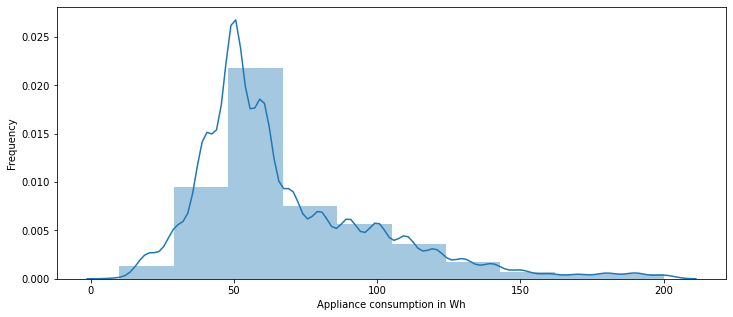

In [544]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

In [545]:
for i in range (0,15000):
    if data["WattHour"][i]>150:
        data = data.drop([i])

In [546]:
data

,id,date,WattHour,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,...,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,random_variable_1,random_variable_2
0,1,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,2,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,3,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,4,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.0,45.410389,45.410389
4,5,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,21.566924,45.000000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,2016-04-24 20:10:00,110,0,22.100000,35.760000,19.533333,37.400000,22.390000,34.030000,...,20.290000,33.030000,5.100000,757.833333,73.666667,4.666667,40.000000,0.7,3.293259,3.293259
14996,14997,2016-04-24 20:20:00,110,10,22.033333,35.626667,19.500000,37.290000,22.426667,34.000000,...,20.290000,32.900000,4.900000,757.866667,75.333333,4.333333,40.000000,0.8,32.690584,32.690584
14997,14998,2016-04-24 20:30:00,110,0,21.163095,35.466667,19.426667,37.290000,22.426667,34.000000,...,20.290000,32.826667,4.700000,757.900000,77.000000,4.000000,40.000000,0.9,46.457592,46.457592
14998,14999,2016-04-24 20:40:00,110,0,21.163095,35.400000,19.356667,37.360000,22.390000,33.900000,...,20.260000,32.663333,4.500000,757.933333,78.666667,3.666667,40.000000,1.0,43.027440,43.027440


In [547]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(data,test_size=0.25,random_state=40)
#test = test1

In [548]:
col_temp = ["degree_C1","degree_C2","degree_C3","degree_C4","degree_C5","degree_C6","degree_C7","degree_C8","degree_C9"]

col_hum = ["moisture_1","moisture_2","moisture_3","moisture_4","moisture_5","moisture_6","moisture_7","moisture_8","moisture_9"]

col_weather = ["degree_Cout", "dew_index","moisture_out","Pressure",
                "Wind","Clarity"] 

col_light = ["luminousity"]

col_randoms = ["random_variable_1", "random_variable_2"]

col_target = ["WattHour"]

# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

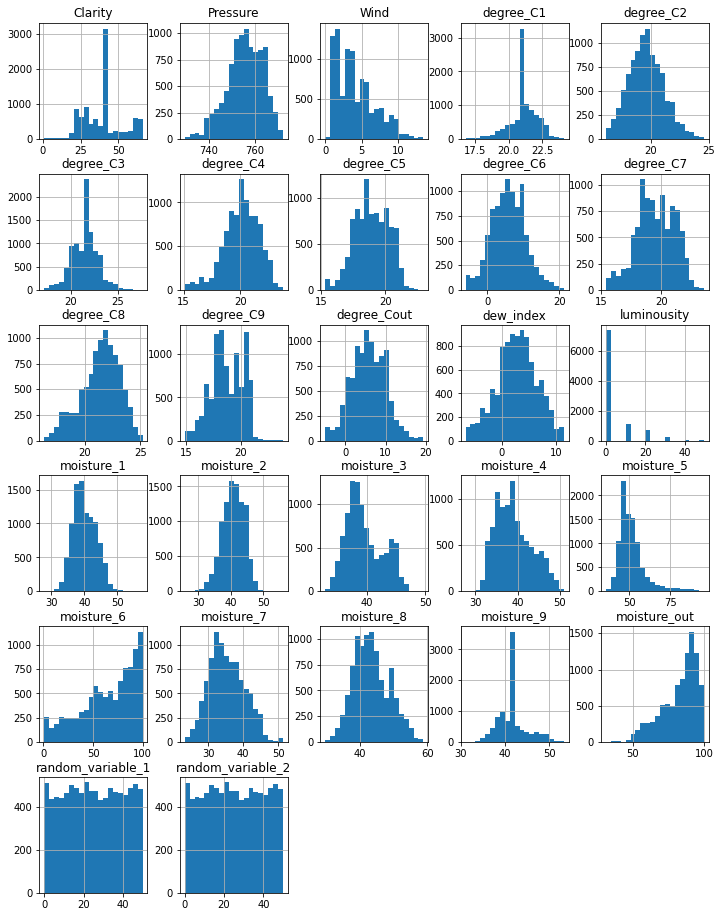

In [549]:
feature_vars.hist(bins = 20 , figsize= (12,16)) ;


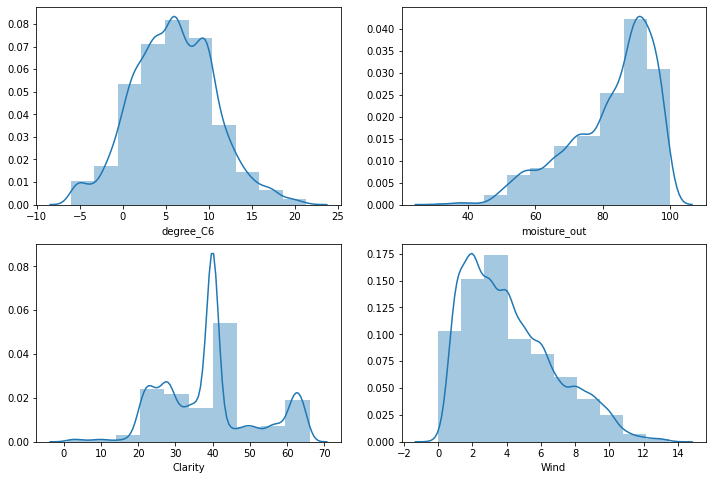

In [550]:
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["degree_C6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["moisture_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Clarity"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Wind"],bins=10, ax=ax[1][1])


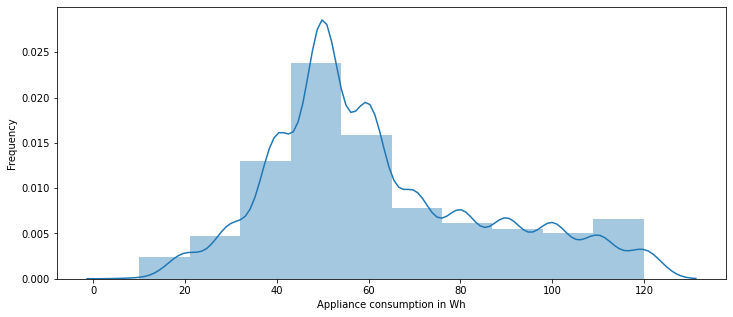

In [551]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

In [552]:
#removing outliers


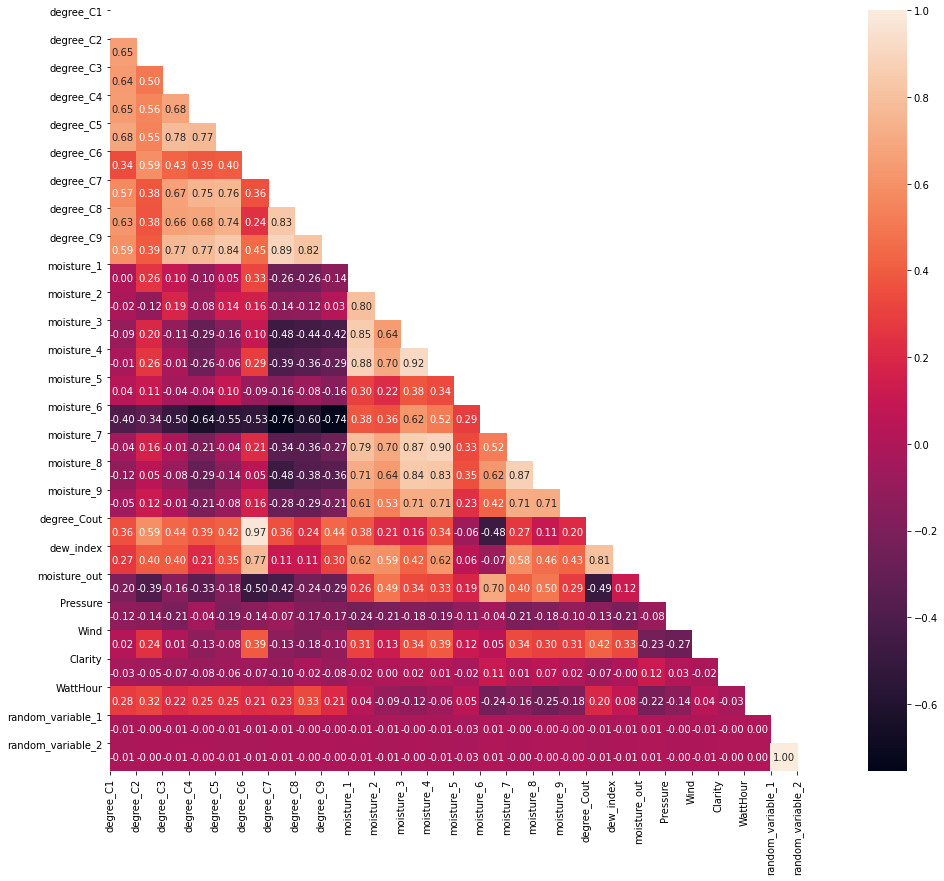

In [553]:
# Use the weather , temperature , applainces and random column to see the correlation
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [554]:
#clarity rn1, rn2, deg6, deg9

In [555]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [556]:
train_X.drop(["luminousity","random_variable_1","random_variable_2","degree_C9","degree_C6","Clarity"],axis=1 , inplace=True)
test_X.drop(["luminousity","random_variable_1","random_variable_2","degree_C9","degree_C6","Clarity"], axis=1, inplace=True)


In [557]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [558]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]


In [559]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [560]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.02454209327697754,
  'Train_R2_Score': 0.2994137942110492,
  'Test_R2_Score': 0.30084716162959735,
  'Test_RMSE_Score': 19.750566155110363},
 {'Name': 'Ridge: ',
  'Train_Time': 0.0046045780181884766,
  'Train_R2_Score': 0.3193317666426845,
  'Test_R2_Score': 0.3132624002264941,
  'Test_RMSE_Score': 19.57441987880789},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.03516674041748047,
  'Train_R2_Score': 0.7627623623276881,
  'Test_R2_Score': 0.6244478011402042,
  'Test_RMSE_Score': 14.475335599874759},
 {'Name': 'SVR:',
  'Train_Time': 7.206642150878906,
  'Train_R2_Score': -0.028362526778972663,
  'Test_R2_Score': -0.015928785128574097,
  'Test_RMSE_Score': 23.8081209189423},
 {'Name': 'RandomForest ',
  'Train_Time': 13.085816144943237,
  'Train_R2_Score': 0.9589114746479562,
  'Test_R2_Score': 0.7156714733057459,
  'Test_RMSE_Score': 12.595160442051315},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 3.7818355560302734,
  'Train_R2_Sco

In [561]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.024542,0.299414,0.300847,19.750566
1,Ridge:,0.004605,0.319332,0.313262,19.574420
2,KNeighborsRegressor:,0.035167,0.762762,0.624448,14.475336
3,SVR:,7.206642,-0.028363,-0.015929,23.808121
4,RandomForest,13.085816,0.958911,0.715671,12.595160
5,ExtraTreeRegressor :,3.781836,1.000000,0.729014,12.296098
6,GradientBoostingClassifier:,3.716888,0.516886,0.460594,17.348076
7,XGBRegressor:,1.492351,0.887679,0.663840,13.695148
8,MLPRegressor:,4.257980,0.227155,0.236779,20.635667


In [562]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [30,35],
              'n_estimators' : [240,250],
              'max_features': ["auto", "sqrt"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=40,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_g

In [564]:
# Tuned parameter set
print("Calculated param : ", grid_search.best_params_)

# Best possible parameters for ExtraTreesRegressor
print("best param       : ", grid_search.best_estimator_)

print("R2 (train)       : ", grid_search.best_estimator_.score(train_X,train_y))

# R2 score on test set with tuned parameters
print("R2 (test)        : ", (grid_search.best_estimator_.score(test_X,test_y)))

print("RMSE             : " ,(np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))))

Calculated param :  {'max_depth': 35, 'max_features': 'auto', 'n_estimators': 250}
best param       :  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=35, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=250, n_jobs=None, oob_score=False,
                    random_state=40, verbose=0, warm_start=False)
R2 (train)       :  0.999998378414812
R2 (test)        :  0.728262828557255
RMSE             :  12.313117164142959


In [565]:
grid_search.best_estimator_.predict(test1)

array([76.88, 77.32, 76.8 , ..., 86.6 , 86.2 , 86.52])

In [530]:
####testing

In [566]:
test1 = pd.read_csv("/kaggle/input/dataquest2020/energy_test.csv")
test1['moisture_9'].fillna((test1['moisture_9'].mean()), inplace=True)

test1.drop(["luminousity","random_variable_1","random_variable_2","degree_C9","degree_C6","Clarity", "id", "date"], axis=1, inplace=True)

print(np.shape(test_X))
print(np.shape(test1))
#print(test_X.head(1))
#print(test1.head(1))

#test1 needs transformation

(3155, 21)
(4375, 21)


In [567]:
pred = grid_search.best_estimator_.predict(test1)
sample = pd.read_csv("/kaggle/input/dataquest2020/sample_submission.csv")
sample["WattHour"] = pred
pred = sample
print(pred)



#sc = sc.fit(pred)
#pred1 = sc.inverse_transform(pred)

         id  WattHour
0     15001     76.88
1     15002     77.32
2     15003     76.80
3     15004     76.88
4     15005     77.52
...     ...       ...
4370  19371     86.48
4371  19372     85.08
4372  19373     86.60
4373  19374     86.20
4374  19375     86.52

[4375 rows x 2 columns]


In [568]:

#actual testing
#pred= pred.reshape(-1, 1)
#pred1 = sc.inverse_transform(pred)
#pred1

In [569]:
##############################################################################################################3
from sklearn.metrics import mean_squared_error

pred = grid_search.best_estimator_.predict(test1)

soln = pd.read_csv("/kaggle/input/testderived/derived.csv")
rmse = sqrt(mean_squared_error(soln["WattHour"], pred))
rmse

84.84259196902731

In [570]:
print(pred)

[76.88 77.32 76.8  ... 86.6  86.2  86.52]


In [571]:
#pred = model.predict(test).astype(int)
pred = pred.astype(int)

sample = pd.read_csv("/kaggle/input/dataquest2020/sample_submission.csv")
submission_df = pd.DataFrame(columns=['id', 'WattHour'])
submission_df['id'] = sample['id']
submission_df['WattHour'] = pred

for i in range (0,4375):
    if submission_df["WattHour"][i]%10 != 0:
        if (submission_df["WattHour"][i]%10) > 5:
            submission_df["WattHour"][i] = submission_df["WattHour"][i] + (10 - submission_df["WattHour"][i]%10)
        else:
            submission_df["WattHour"][i] = submission_df["WattHour"][i] - (submission_df["WattHour"][i]%10)

print(submission_df)
submission_df.to_csv('output.csv', header=True, index=False)



         id  WattHour
0     15001        80
1     15002        80
2     15003        80
3     15004        80
4     15005        80
...     ...       ...
4370  19371        90
4371  19372        80
4372  19373        90
4373  19374        90
4374  19375        90

[4375 rows x 2 columns]


In [76]:
sample = pd.read_csv("/kaggle/input/dataquest2020/sample_submission.csv")
sample.head(15)


,id,WattHour
0,15001,90
1,15002,0
2,15003,0
3,15004,90
4,15005,80
5,15006,80
6,15007,0
7,15008,0
8,15009,0
9,15010,70


In [ ]:
### external answer
soln = pd.read_csv("/kaggle/input/testderived/derived.csv")

rmse = sqrt(mean_squared_error(soln["WattHour"], pred))

print(rmse)